In [1]:
import numpy as np
import tensorflow as tf 
import tensorflow.keras as keras
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
#tensorflow
import tensorflow as tf
from keras.layers import Dense, LSTM, Bidirectional, RNN
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

In [3]:
!ls subject1

Activities.csv	activities_data.csv  sensors.csv


In [4]:
activities_root = "./subject2/Activities.csv"
sensors_root = "./subject2/sensors.csv"
data_root = "./subject2/activities_data.csv"

In [5]:
#load_df:
act = pd.read_csv(activities_root)
sens = pd.read_csv(sensors_root)

In [6]:
act.head()

,Heading,Category,Subcategory,Code
0,Employment related,Employment work at home,Work at home,1
1,Employment related,Travel employment,Going out to work,5
2,Personal needs,Eating,Eating,10
3,Personal needs,Personal hygiene,Toileting,15
4,Personal needs,Personal hygiene,Bathing,20


In [7]:
sens.head()

,100,Bathroom,Sink faucet - hot
0,101,Bedroom,TV
1,102,Living room,Light switch
2,103,Hallway,Light switch
3,104,Kitchen,Cabinet
4,106,Bedroom,Light switch


In [8]:
#load data
with open(data_root, 'r') as file:
    data = file.readlines()

In [137]:
debug = False
_Act = []
_Obs = []
_Start = []
_End = []
for i in range(int(len(data)/5)):
    _Act.append(data[i*5].split(',')[0])
    _Obs.append(data[i*5+1][:-1])
    _Start.append(data[i*5+3][:-1])
    _End.append(data[i*5+4][:-1])
    
    if debug:
        print(_Act)
        print(_Obs)
        print(_Start)
        print(_End)
        break
    
    

In [138]:
_Start = [readings.split(',') for readings in _Start]
_End = [readings.split(',') for readings in _End]

In [139]:
delta = _End

In [140]:
from datetime import datetime

In [141]:
for i in range(len(delta)):
    for j in range(len(delta[i])):
        delta[i][j] = datetime.strptime(_End[i][j], '%H:%M:%S') - datetime.strptime(_Start[i][j], '%H:%M:%S')

for i in range(len(delta)):
    for j in range(len(delta[i])):
        delta[i][j] = delta[i][j].seconds

In [149]:
maxt = 0
for i in range(len(delta)):
    for j in range(len(delta[i])):
        
        if delta[i][j] > maxt: 
                    maxt = delta[i][j]
print(maxt)

74410


In [122]:
delta

[[2,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  2,
  3,
  0,
  15,
  2,
  0,
  2,
  23,
  0,
  14,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  298],
 [40, 40, 0, 0, 0, 4, 309, 0, 14, 0, 189, 0, 0, 50, 350],
 [0, 13, 93],
 [0, 0, 0],
 [298, 0, 1],
 [299, 0, 30, 0, 0, 65, 0, 13, 93],
 [0, 0, 1, 39, 129, 0, 0, 1, 0, 0, 691, 1, 252, 0],
 [157,
  0,
  1,
  541,
  20,
  27,
  25,
  0,
  0,
  0,
  0,
  0,
  2,
  3,
  0,
  1,
  0,
  0,
  0,
  111,
  15,
  0,
  29,
  24,
  15,
  16,
  0,
  48,
  100,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [38, 105, 0, 0, 0, 20, 73, 166],
 [0, 284],
 [522],
 [16, 36, 31],
 [1, 0, 0, 1, 0],
 [369, 0],
 [4, 57, 0, 0, 0, 132, 1, 2],
 [8, 5],
 [8],
 [0, 0, 0, 0],
 [0, 31],
 [0, 63, 0, 0],
 [0, 3, 692, 22, 0, 458, 0, 0, 0, 0, 7],
 [0, 493, 3, 0, 0, 0, 0, 0, 72],
 [3, 910, 24, 100, 958, 0],
 [0, 0, 3, 0, 0, 32, 35, 308, 249, 809],
 [138, 1, 0],
 [0, 9, 194, 0, 0, 0, 0, 2, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 20, 0, 2, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],

In [150]:
idx2act = sorted(set(_Act))

In [151]:
act2idx = {act : i for i, act in enumerate(idx2act)}

In [152]:
X = [readings.split(',') for readings in _Obs]
y = [act2idx[act] for act in _Act]

In [153]:
MAX_LEN = 300
X_np = np.array(X, dtype=object)
T_np = np.array(delta, dtype=object)
y_np = np.array(y, dtype=np.float32)
X_np = sequence.pad_sequences(X_np, maxlen=MAX_LEN, dtype=np.float32)
T_np = sequence.pad_sequences(T_np, maxlen=MAX_LEN, dtype=np.float32)

In [154]:
T_tensor = tf.convert_to_tensor(T_np, dtype=tf.float32)
X_tensor = tf.convert_to_tensor(X_np, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y_np, dtype=tf.float32)

# Model ?

In [155]:
def get(emb):
    model = Sequential(name='SensorObsEmbed')
    model.add(Embedding(emb, 64, input_length=300, mask_zero=True))
    model.add((LSTM(64)))
    model.add(Dense(32, activation='relu'))
    return model

In [156]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam

In [157]:
sns_mod = get(300)
del_mod = get(100000)
combinedInput = concatenate([sns_mod.output, del_mod.output])

x = Dense(len(idx2act), activation='softmax')(combinedInput)
model = Model(inputs=[sns_mod.input, del_mod.input], outputs=x)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [158]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [159]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_10_input (InputLayer) [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_11_input (InputLayer) [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 300, 64)      19200       embedding_10_input[0][0]         
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 300, 64)      6400000     embedding_11_input[0][0]         
____________________________________________________________________________________________

In [162]:
history = model.fit([X_tensor, T_sensor], y_tensor, validation_split=0.2, epochs=50, batch_size=8)

Epoch 1/50
21/21 [==============================] - 3s 163ms/step - loss: 2.9980 - accuracy: 0.2349 - val_loss: 2.8376 - val_accuracy: 0.2143
Epoch 2/50
21/21 [==============================] - 3s 164ms/step - loss: 2.7460 - accuracy: 0.2349 - val_loss: 2.6850 - val_accuracy: 0.2857
Epoch 3/50
21/21 [==============================] - 3s 165ms/step - loss: 2.5915 - accuracy: 0.2892 - val_loss: 2.6109 - val_accuracy: 0.3095
Epoch 4/50
21/21 [==============================] - 3s 165ms/step - loss: 2.4660 - accuracy: 0.3494 - val_loss: 2.5262 - val_accuracy: 0.4286
Epoch 5/50
21/21 [==============================] - 3s 164ms/step - loss: 2.2157 - accuracy: 0.4699 - val_loss: 2.4831 - val_accuracy: 0.4048
Epoch 6/50
21/21 [==============================] - 3s 163ms/step - loss: 1.9551 - accuracy: 0.5361 - val_loss: 2.2799 - val_accuracy: 0.4048
Epoch 7/50
21/21 [==============================] - 3s 162ms/step - loss: 1.6827 - accuracy: 0.6084 - val_loss: 2.2286 - val_accuracy: 0.4286
Epoch 

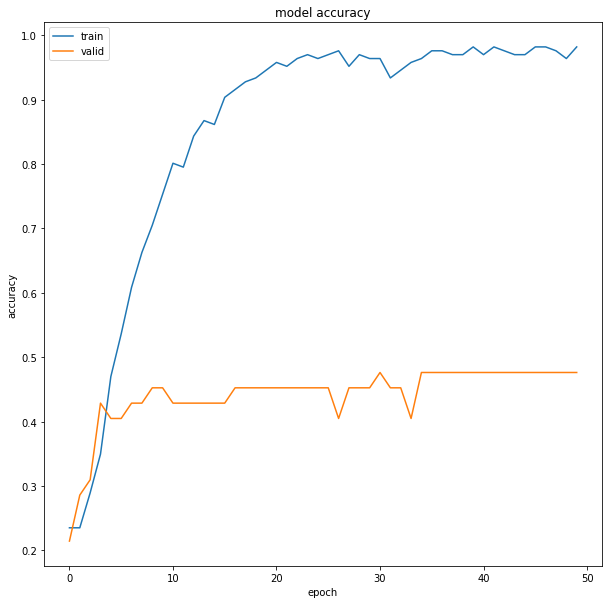

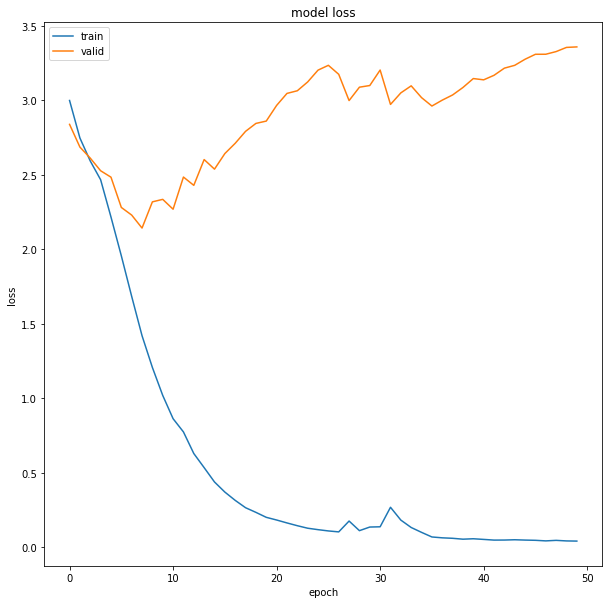

In [163]:
def plot_history(dict):
    # summarize history for accuracy
    plt.figure(figsize=(10,10))
    plt.plot(dict['accuracy'])
    plt.plot(dict['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(10,10))
    plt.plot(dict['loss'])
    plt.plot(dict['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
plot_history(history.history)

In [186]:
sns_mod = get(300)
del_mod = get(100000)
combinedInput = concatenate([sns_mod.output, del_mod.output])

x = Dense(len(idx2act), activation='softmax')(combinedInput)
model2 = Model(inputs=[sns_mod.input, del_mod.input], outputs=x)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [187]:
tf.keras.utils.plot_model(
    model2, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [188]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [189]:
history = model2.fit([X_tensor, T_sensor], y_tensor, validation_split=0.2, epochs=25, batch_size=8, callbacks=[tensorboard_callback])

Epoch 1/25
21/21 [==============================] - 5s 248ms/step - loss: 3.1600 - accuracy: 0.0723 - val_loss: 3.1195 - val_accuracy: 0.1905
Epoch 2/25
21/21 [==============================] - 3s 162ms/step - loss: 3.0066 - accuracy: 0.2590 - val_loss: 2.8623 - val_accuracy: 0.2381
Epoch 3/25
21/21 [==============================] - 3s 162ms/step - loss: 2.7828 - accuracy: 0.2892 - val_loss: 2.7731 - val_accuracy: 0.2857
Epoch 4/25
21/21 [==============================] - 3s 166ms/step - loss: 2.6008 - accuracy: 0.2711 - val_loss: 2.6391 - val_accuracy: 0.4286
Epoch 5/25
21/21 [==============================] - 3s 165ms/step - loss: 2.4028 - accuracy: 0.3855 - val_loss: 2.5264 - val_accuracy: 0.3571
Epoch 6/25
21/21 [==============================] - 3s 163ms/step - loss: 2.1974 - accuracy: 0.4036 - val_loss: 2.3937 - val_accuracy: 0.3571
Epoch 7/25
21/21 [==============================] - 3s 165ms/step - loss: 1.9549 - accuracy: 0.4217 - val_loss: 2.3026 - val_accuracy: 0.3333
Epoch 

In [193]:
%load_ext tensorboard
%tensorboard --logdir {logdir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


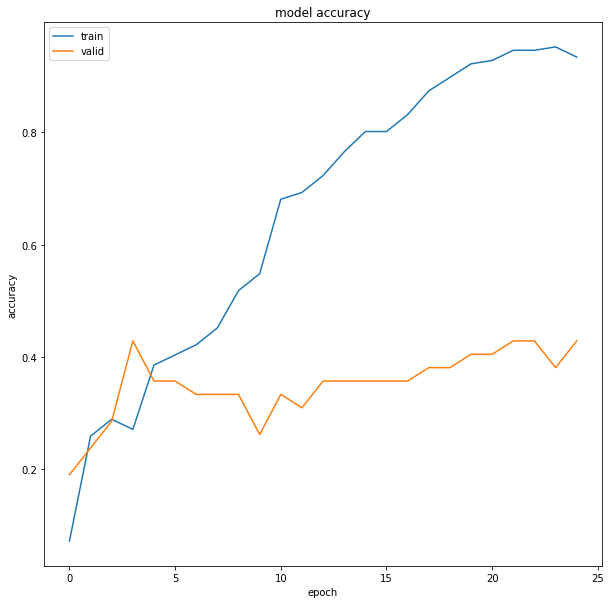

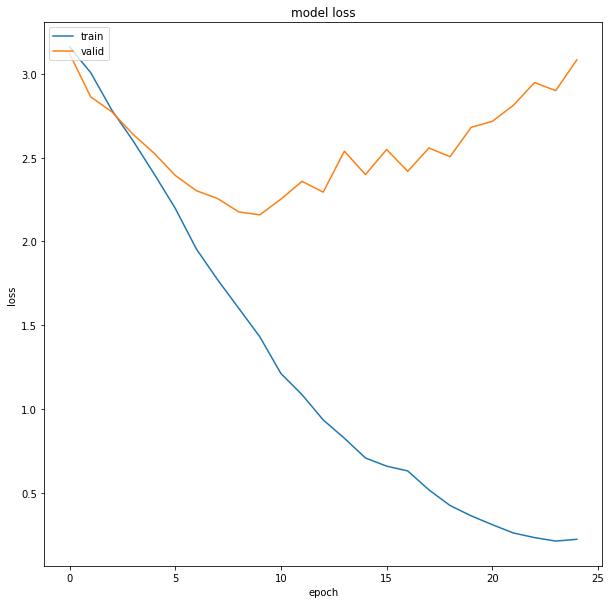

In [194]:
plot_history(history.history)